In [1]:
import httpx
import base64
from PIL import Image
from io import BytesIO
import numpy as np

In [2]:
URL = "https://cerulean-cloud-test-cloud-run-offset-tiles-4ac5c4-5qkjkyomta-ew.a.run.app"

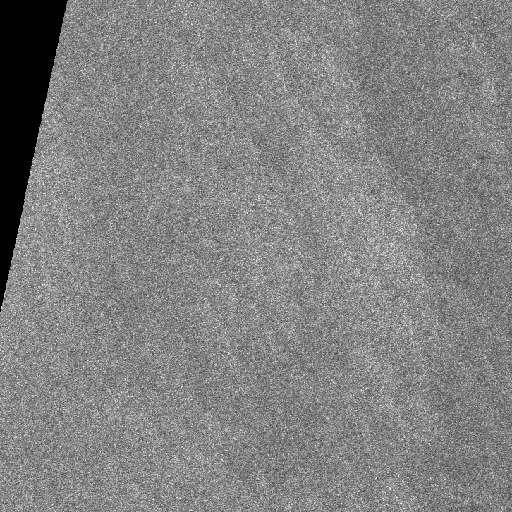

(512, 512)


In [3]:
org_img = Image.open("../test/test_cerulean_cloud/fixtures/tile_512_512.png")
display(org_img)
im = Image.fromarray(np.squeeze(org_img).astype("int8"))
print(np.array(im).shape)
tmp = BytesIO()
im.save(tmp, format="PNG")
encoded_img = base64.b64encode(tmp.getvalue()).decode("ascii")

In [4]:
inference_result = httpx.post(URL+"/predict", json={"image": encoded_img, "bounds": [1,2,3,4]}, timeout=None)
inference_result_2 = httpx.post(URL+"/predict", json={"image": encoded_img, "bounds": [1,2,3,4]}, timeout=None)
inference_result_3 = httpx.post(URL+"/predict", json={"image": encoded_img, "bounds": [1,2,3,4]}, timeout=None)


print(inference_result)

<Response [200 OK]>


In [5]:
print(inference_result.elapsed)
print(inference_result_2.elapsed)
print(inference_result_3.elapsed)
result = inference_result.json()
print(result)

0:00:06.847935
0:00:03.999177
0:00:03.519256
{'classes': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIAEAAAAACBg1dlAAACE0lEQVR4nO3BgQAAAADDoPlTn+AGVQEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADANwJ4AAHuUcMGAAAAAElFTkSuQmCC', 'confidence': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIAEAAAAACBg1dlAAAHuklEQVR4nO3dy27bOhRAUTv//8++gyJAb+q3JYXkXmtQdFC0nXDrkJSd8+k3nH/lXwV++Prt/wDwewQAwgQAwgQAwgQA

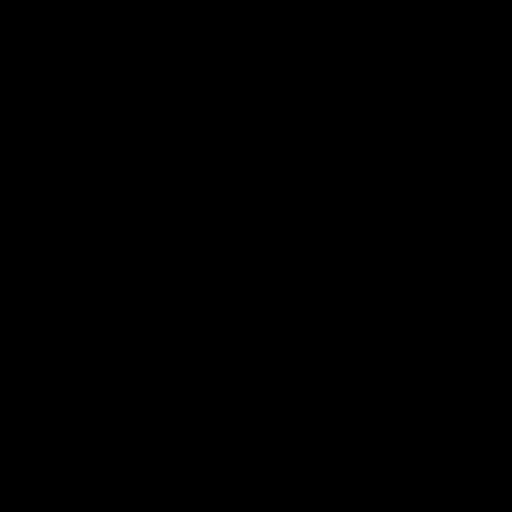

(512, 512)


In [6]:
img_bytes = base64.b64decode(result["classes"])
tmp = BytesIO()
tmp.write(img_bytes)
img = Image.open(tmp)
display(img)
np_img = np.array(img)
print(np_img.shape)